# **Détection d’apparition d’anomalies dans des séries d’images naturelles de matériel ferroviaire (Alstom)**
Reférents : Thomas Grenier
            N. Pagnard

## **Objectives**
1. Aiming at x10 productivity improvement, meaning :
2. Targetting 10% false positive
    (= found different, while showing same rail portion)
3. Targetting 0% false negative
    (= found identical, while it’s either a different portion, or an edited defect)

In [ ]:
import cv2
#from skimage import io
from IPython.display import Image



#img = cv2.imread('/imagesBRS/20230320_081608_BRS_L_UP_12.514_01_crack.png')

#cv2.imshow("./imagesBRS/20230320_081608_BRS_L_UP_12.514_01_crack.png", image)

#image = io.imread('20230320_175414_BRS_R_DN_23.525_00.jpg')
#image = io.imread('20230320_123354_BRS_R_DN_23.525_00.jpg')



img_1 = cv2.imread('20230320_175414_BRS_R_DN_23.525_00.jpg')
gray_1 = cv2.cvtColor(img_1,cv2.COLOR_BGR2GRAY)

img_2 = cv2.imread('20230320_123354_BRS_R_DN_23.525_00.jpg')
gray_2 = cv2.cvtColor(img_2,cv2.COLOR_BGR2GRAY)

sift = cv2.SIFT_create()
kp1 = sift.detect(gray_1,None)
kp2 = sift.detect(gray_2,None)
kp1, des1 = sift.compute(img_1, kp1)
kp2, des2 = sift.compute(img_2, kp2)




# Création de l'objet de correspondance des FLANN (Fast Library for Approximate Nearest Neighbors)
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)  # Paramètres de recherche
flann = cv2.FlannBasedMatcher(index_params, search_params)

# Trouver les correspondances entre les descripteurs des deux images
matches = flann.knnMatch(des1, des2, k=2)

# Garder les bonnes correspondances en utilisant le test de ratio de Lowe
good_matches = []
for m, n in matches:
    if m.distance < 0.7 * n.distance:
        good_matches.append(m)

# Dessiner les correspondances
matching_result = cv2.drawMatches(img_1, kp1, img_2, kp2, good_matches, None, flags=2)

# Afficher le résultat des correspondances
cv2.imshow('Matching Result', matching_result)
cv2.waitKey(0)
cv2.destroyAllWindows()




#img=cv2.drawKeypoints(gray,kp,img)
#cv2.imwrite('sift_keypoints.jpg',img)

#Image(filename='sift_keypoints.jpg')

QObject::moveToThread: Current thread (0x55deb2c96670) is not the object's thread (0x55deb4164fc0).
Cannot move to target thread (0x55deb2c96670)

QObject::moveToThread: Current thread (0x55deb2c96670) is not the object's thread (0x55deb4164fc0).
Cannot move to target thread (0x55deb2c96670)

QObject::moveToThread: Current thread (0x55deb2c96670) is not the object's thread (0x55deb4164fc0).
Cannot move to target thread (0x55deb2c96670)

QObject::moveToThread: Current thread (0x55deb2c96670) is not the object's thread (0x55deb4164fc0).
Cannot move to target thread (0x55deb2c96670)

QObject::moveToThread: Current thread (0x55deb2c96670) is not the object's thread (0x55deb4164fc0).
Cannot move to target thread (0x55deb2c96670)

QObject::moveToThread: Current thread (0x55deb2c96670) is not the object's thread (0x55deb4164fc0).
Cannot move to target thread (0x55deb2c96670)

QObject::moveToThread: Current thread (0x55deb2c96670) is not the object's thread (0x55deb4164fc0).
Cannot move to tar

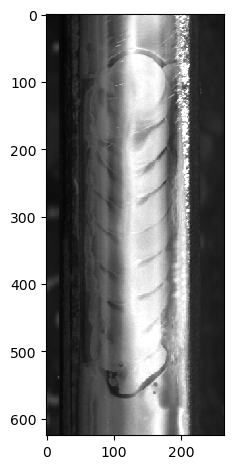

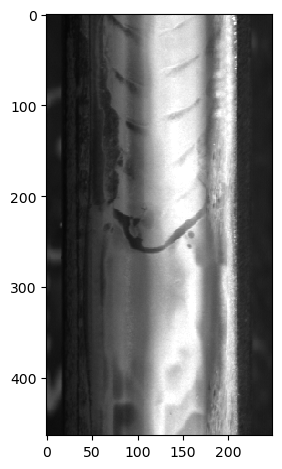

ValueError: The parameter `image` must be a 2-dimensional array

In [1]:
import numpy as np
from skimage import data
from skimage.color import rgb2gray
from skimage.feature import match_descriptors, ORB, plot_matches
from skimage.measure import ransac
from skimage.transform import FundamentalMatrixTransform
from skimage import io
import matplotlib.pyplot as plt

img_left, img_right, groundtruth_disp = data.stereo_motorcycle()
img_left, img_right = map(rgb2gray, (img_left, img_right))
# Charger une image
img_left = io.imread('20230320_175414_BRS_R_DN_23.525_00.jpg')
img_right = io.imread('20230320_123354_BRS_R_DN_23.525_00.jpg')

# Afficher l'image
io.imshow(img_left)
io.show()
io.imshow(img_right)
io.show()

# Find sparse feature correspondences between left and right image.

descriptor_extractor = ORB()

descriptor_extractor.detect_and_extract(img_left)
keypoints_left = descriptor_extractor.keypoints
descriptors_left = descriptor_extractor.descriptors

descriptor_extractor.detect_and_extract(img_right)
keypoints_right = descriptor_extractor.keypoints
descriptors_right = descriptor_extractor.descriptors

matches = match_descriptors(descriptors_left, descriptors_right,
                            cross_check=True)

print(f'Number of matches: {matches.shape[0]}')

# Estimate the epipolar geometry between the left and right image.
random_seed = 9
rng = np.random.default_rng(random_seed)

model, inliers = ransac((keypoints_left[matches[:, 0]],
                         keypoints_right[matches[:, 1]]),
                        FundamentalMatrixTransform, min_samples=8,
                        residual_threshold=1, max_trials=5000,
                        random_state=rng)

inlier_keypoints_left = keypoints_left[matches[inliers, 0]]
inlier_keypoints_right = keypoints_right[matches[inliers, 1]]

print(f'Number of inliers: {inliers.sum()}')

# Compare estimated sparse disparities to the dense ground-truth disparities.

disp = inlier_keypoints_left[:, 1] - inlier_keypoints_right[:, 1]
disp_coords = np.round(inlier_keypoints_left).astype(np.int64)
disp_idxs = np.ravel_multi_index(disp_coords.T, groundtruth_disp.shape)
disp_error = np.abs(groundtruth_disp.ravel()[disp_idxs] - disp)
disp_error = disp_error[np.isfinite(disp_error)]

# Visualize the results.

fig, ax = plt.subplots(nrows=2, ncols=1)

plt.gray()

plot_matches(ax[0], img_left, img_right, keypoints_left, keypoints_right,
             matches[inliers], only_matches=True)
ax[0].axis("off")
ax[0].set_title("Inlier correspondences")

ax[1].hist(disp_error)
ax[1].set_title("Histogram of disparity errors")

plt.show()
